<a href="https://colab.research.google.com/github/Lerity12/my-project/blob/main/Module_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Перша частина роботи над даними "Data overview":

* завантаження даних

* перегляд даних

* перевірка форматів

* виявлення ключових полів, що поєднують три таблиці

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import textwrap

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Python_colab

/content/drive/MyDrive/Python_colab


In [ ]:
# завантаження таблиці Products

df_countries = pd.read_csv("countries.csv")
df_countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
# перевірка на пропущені значення в датафреймі Countries (alpha-2, alpha-3, region, sub-region)

df_countries.isna().sum()

,0
name,0
alpha-2,1
alpha-3,0
region,1
sub-region,1


In [ ]:
# завантаження таблиці Events

df_events = pd.read_csv("events.csv")
df_events.head()

# спільна колонка з таблицею countries alpa-3  = Country Code
# потрібно виправити формат дати

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
# перевірка на пропущені значення в датафреймі Events (Country Code - 82, Units Sold - 2)

df_events.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Order Priority,0
Country Code,82
Product ID,0
Sales Channel,0
Units Sold,2
Unit Price,0
Unit Cost,0


In [ ]:
# завантаження таблиці Products

df_products = pd.read_csv("products.csv")
df_products.head()

# спільна колонка з таблицею events Product ID  = id

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
# перевірка на пропущені значення в датафреймі Products

df_products.isna().sum()

,0
id,0
item_type,0


In [ ]:
# інформація по к-сті рядків і стовпців

print(df_countries.shape)

print(df_products.shape)

print(df_events.shape)

(249, 5)
(12, 2)
(1330, 10)


In [ ]:
# детальна інформація по датафреймах

print(df_countries.info())

print(df_events.info())

print(df_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Pric

In [ ]:
# тип даних в датафреймах

print(df_countries.dtypes)

print(df_events.dtypes)

print(df_products.dtypes)

name          object
alpha-2       object
alpha-3       object
region        object
sub-region    object
dtype: object
Order ID            int64
Order Date         object
Ship Date          object
Order Priority     object
Country Code       object
Product ID          int64
Sales Channel      object
Units Sold        float64
Unit Price        float64
Unit Cost         float64
dtype: object
id            int64
item_type    object
dtype: object


In [ ]:
# статистика

print(df_countries.describe())

print(df_events.describe())

print(df_products.describe())

               name alpha-2 alpha-3  region          sub-region
count           249     248     249     248                 248
unique          249     248     249       5                  17
top     Afghanistan      AF     AFG  Africa  Sub-Saharan Africa
freq              1       1       1      60                  53
           Order ID   Product ID   Units Sold   Unit Price    Unit Cost
count  1.330000e+03  1330.000000  1328.000000  1330.000000  1330.000000
mean   5.412048e+08  5788.096241  4952.201807   264.893541   187.246812
std    2.573882e+08  2820.728878  2905.198996   217.323460   176.158873
min    1.006406e+08  1270.000000     2.000000     9.330000     6.920000
25%    3.190004e+08  3127.000000  2356.750000    81.730000    35.840000
50%    5.387164e+08  5988.000000  4962.000000   154.060000    97.440000
75%    7.544628e+08  8681.000000  7459.500000   437.200000   263.330000
max    9.998797e+08  8969.000000  9999.000000   668.270000   524.960000
                id
count    12.0

### Друга частина роботи над даними "Data cleaning":
* перетворення типів даних у колонках
* заповнення рядків з пустими значеннями
* перевірка даних на наявність дублікатів
* форматування назв


In [ ]:
# в датафреймі Countries присутня колонка  alpha-2 в якій зазначений код країни, якщо код країни NA - це буде читатись як порожнє значення, прописую код, щоб уникнути цього

df_countries = pd.read_csv("countries.csv",dtype={"alpha-2": "string"},keep_default_na=False)

In [ ]:
# перевірка порожніх значеннь у клітинках і чи зберігся код NA

df_countries.loc[df_countries["name"].isin(["Antarctica", "Namibia"])]

,name,alpha-2,alpha-3,region,sub-region
8,Antarctica,AQ,ATA,,
153,Namibia,NA,NAM,Africa,Sub-Saharan Africa


In [ ]:
# заповнення порожніх значеннь у клітинках (так як відсутня загально відома інформація яку можна знайти, заповнюю її для NaN рядків)

df_countries.loc[df_countries["name"].eq("Antarctica"), ["region", "sub-region"]] = ["Antarctica", "Antarctica"]

In [ ]:
#перевірка, що все добре

df_countries.loc[df_countries["name"].isin(["Antarctica"])]

,name,alpha-2,alpha-3,region,sub-region
8,Antarctica,AQ,ATA,Antarctica,Antarctica


In [ ]:
# виправлення формату дат в таблиці Events

df_events["Order Date"] = pd.to_datetime(df_events["Order Date"])

df_events["Ship Date"] = pd.to_datetime(df_events["Ship Date"])

In [ ]:
# перевірка

df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1330 non-null   int64         
 1   Order Date      1330 non-null   datetime64[ns]
 2   Ship Date       1330 non-null   datetime64[ns]
 3   Order Priority  1330 non-null   object        
 4   Country Code    1248 non-null   object        
 5   Product ID      1330 non-null   int64         
 6   Sales Channel   1330 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1330 non-null   float64       
 9   Unit Cost       1330 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 104.0+ KB


In [ ]:
# merge таблиць Events <- Countries

cols_from_countries = ["alpha-3", "region", "sub-region", "name", "alpha-2"]
df_events_ext = df_events.merge(df_countries[cols_from_countries], how="left", left_on="Country Code", right_on="alpha-3", suffixes=("", "_country"))

In [ ]:
df_events_ext.head(10)

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,alpha-3,region,sub-region,name,alpha-2
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,NOR,Europe,Northern Europe,Norway,NO
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,SRB,Europe,Southern Europe,Serbia,RS
2,101025998,2014-07-18,2014-08-11,M,NaN,7940,Online,4693.0,668.27,502.54,NaN,NaN,NaN,NaN,<NA>
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,MNE,Europe,Southern Europe,Montenegro,ME
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,SRB,Europe,Southern Europe,Serbia,RS
5,103450715,2015-03-15,2015-04-18,H,SVK,8681,Online,2220.0,651.21,524.96,SVK,Europe,Eastern Europe,Slovakia,SK
6,103499639,2013-04-20,2013-06-06,L,FRA,4594,Online,6698.0,9.33,6.92,FRA,Europe,Western Europe,France,FR
7,103762280,2011-11-12,2011-12-14,M,ESP,5988,Online,4419.0,154.06,90.93,ESP,Europe,Southern Europe,Spain,ES
8,103832662,2012-09-19,2012-10-20,H,HRV,7331,Offline,5247.0,255.28,159.42,HRV,Europe,Southern Europe,Croatia,HR
9,104008615,2011-01-23,2011-02-22,M,DEU,2103,Online,7315.0,205.70,117.11,DEU,Europe,Western Europe,Germany,DE


In [ ]:
# merge Product до основних даних (Events <- Products)

df_events_ext = df_events.merge(df_countries[["alpha-3","name","region","sub-region","alpha-2"]], how="left", left_on="Country Code", right_on="alpha-3", validate="m:1").merge(
    df_products[["id","item_type"]].rename(columns={"id":"Product ID"}),how="left", on="Product ID", validate="m:1")

In [ ]:
df_events_ext.head(10)

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,alpha-3,name,region,sub-region,alpha-2,item_type
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,NOR,Norway,Europe,Northern Europe,NO,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,SRB,Serbia,Europe,Southern Europe,RS,Cereal
2,101025998,2014-07-18,2014-08-11,M,NaN,7940,Online,4693.0,668.27,502.54,NaN,NaN,NaN,NaN,<NA>,Household
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,MNE,Montenegro,Europe,Southern Europe,ME,Clothes
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,SRB,Serbia,Europe,Southern Europe,RS,Beverages
5,103450715,2015-03-15,2015-04-18,H,SVK,8681,Online,2220.0,651.21,524.96,SVK,Slovakia,Europe,Eastern Europe,SK,Office Supplies
6,103499639,2013-04-20,2013-06-06,L,FRA,4594,Online,6698.0,9.33,6.92,FRA,France,Europe,Western Europe,FR,Fruits
7,103762280,2011-11-12,2011-12-14,M,ESP,5988,Online,4419.0,154.06,90.93,ESP,Spain,Europe,Southern Europe,ES,Vegetables
8,103832662,2012-09-19,2012-10-20,H,HRV,7331,Offline,5247.0,255.28,159.42,HRV,Croatia,Europe,Southern Europe,HR,Baby Food
9,104008615,2011-01-23,2011-02-22,M,DEU,2103,Online,7315.0,205.70,117.11,DEU,Germany,Europe,Western Europe,DE,Cereal


Спочатку я вирішила обєднати таблиці і потім продовжувати працювати над чисткою даних (тому що зручніше заповнювати порожні значення в фінальному дата фрейм)

In [ ]:
# перервіряємо к-сть порожніх значень у клітинках

df_events_ext.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Order Priority,0
Country Code,82
Product ID,0
Sales Channel,0
Units Sold,2
Unit Price,0
Unit Cost,0


In [ ]:
# заповнюємо рядки NaN в колонці Units Sold медіаною

median_grp = df_events_ext.groupby("Product ID")["Units Sold"].transform("median")
global_median = df_events_ext["Units Sold"].median()

df_events_ext["Units Sold"] = (df_events_ext["Units Sold"].fillna(median_grp).fillna(global_median).round().astype("Int64"))


In [ ]:
df_events_ext.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Order Priority,0
Country Code,82
Product ID,0
Sales Channel,0
Units Sold,0
Unit Price,0
Unit Cost,0


In [ ]:
df_events_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1330 non-null   int64         
 1   Order Date      1330 non-null   datetime64[ns]
 2   Ship Date       1330 non-null   datetime64[ns]
 3   Order Priority  1330 non-null   object        
 4   Country Code    1248 non-null   object        
 5   Product ID      1330 non-null   int64         
 6   Sales Channel   1330 non-null   object        
 7   Units Sold      1330 non-null   Int64         
 8   Unit Price      1330 non-null   float64       
 9   Unit Cost       1330 non-null   float64       
 10  alpha-3         1248 non-null   object        
 11  name            1248 non-null   object        
 12  region          1248 non-null   object        
 13  sub-region      1248 non-null   object        
 14  alpha-2         1248 non-null   string        
 15  item

In [ ]:
# заповнюємо рядки NaN (тип даних object) значенням Unknown

columns = ["Country Code", "alpha-3", "name", "region", "sub-region", "alpha-2"]

df_events_ext[columns] = (df_events_ext[columns].replace(r"^\s*$", "Unknown", regex=True).fillna("Unknown"))


In [ ]:
df_events_ext.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Order Priority,0
Country Code,0
Product ID,0
Sales Channel,0
Units Sold,0
Unit Price,0
Unit Cost,0


In [ ]:
df_events_ext.head(5)

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,alpha-3,name,region,sub-region,alpha-2,item_type
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650,205.70,117.11,NOR,Norway,Europe,Northern Europe,NO,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993,205.70,117.11,SRB,Serbia,Europe,Southern Europe,RS,Cereal
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693,668.27,502.54,Unknown,Unknown,Unknown,Unknown,Unknown,Household
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171,109.28,35.84,MNE,Montenegro,Europe,Southern Europe,ME,Clothes
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648,47.45,31.79,SRB,Serbia,Europe,Southern Europe,RS,Beverages


In [ ]:
# перевірка чи є дублікати в датафреймі

df_events_ext.duplicated().sum()

np.int64(0)

In [ ]:
# для зручності перейменовую колонку name на Country Name, region - Region, sub-region - Sub-Region

df_events_ext = df_events_ext.rename(columns={
    "name": "Country Name",
    "region": "Region",
    "sub-region": "Sub-Region"
})

In [ ]:
df_events_ext.head(5)

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,alpha-3,Country Name,Region,Sub-Region,alpha-2,item_type
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650,205.70,117.11,NOR,Norway,Europe,Northern Europe,NO,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993,205.70,117.11,SRB,Serbia,Europe,Southern Europe,RS,Cereal
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693,668.27,502.54,Unknown,Unknown,Unknown,Unknown,Unknown,Household
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171,109.28,35.84,MNE,Montenegro,Europe,Southern Europe,ME,Clothes
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648,47.45,31.79,SRB,Serbia,Europe,Southern Europe,RS,Beverages


### Третя частина роботи над даними:



Data analysis and visualization. Аналіз та візуалізація даних, знаходження цінних інсайтів.

Ключові діяльності компанії: загальна кількість замовлень, загальний прибуток, загальна кількість охоплених країн.

Аналіз продажів (доходи, витрати, прибутки, популярність товарів) створення відповідних візуалізацій в розрізі:

* категорій товарів;
* географії (країн, регіонів);
* каналів продажу (онлайн або офлайн).

Аналіз інтервалу часу між замовленням та його відвантаженням та створення відповідних візуалізацій в розрізі:

* категорій товарів;
* країн;
* регіонів.


Аналіз, чи залежить прибуток від часу, необхідного на відвантаження товару.


Аналіз за допомогою візуалізації динаміку продажів (у часі) у розрізі категорій товарів, країн, регіонів, визнач основні тенденції.

Аналіз продажів товарів за днями тижня. Чи можна деякі товари вважати сезонними?

In [ ]:
# ключові метрики


df_events_ext = df_events_ext.assign( Revenue = (df_events_ext["Units Sold"] * df_events_ext["Unit Price"]).round(2),
                              Cost = (df_events_ext["Units Sold"] * df_events_ext["Unit Cost"]).round(2),
                               )
df_events_ext = df_events_ext.assign(Profit = (df_events_ext["Revenue"] - df_events_ext["Cost"]).round(2))

In [ ]:
df_events_ext.head(5)

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,alpha-3,Country Name,Region,Sub-Region,alpha-2,item_type,Revenue,Cost,Profit
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650,205.70,117.11,NOR,Norway,Europe,Northern Europe,NO,Cereal,133705.0,76121.5,57583.5
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993,205.70,117.11,SRB,Serbia,Europe,Southern Europe,RS,Cereal,409960.1,233400.23,176559.87
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693,668.27,502.54,Unknown,Unknown,Unknown,Unknown,Unknown,Household,3136191.11,2358420.22,777770.89
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171,109.28,35.84,MNE,Montenegro,Europe,Southern Europe,ME,Clothes,127966.88,41968.64,85998.24
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648,47.45,31.79,SRB,Serbia,Europe,Southern Europe,RS,Beverages,362897.6,243129.92,119767.68


###Key Metrics

In [ ]:
summary = pd.DataFrame({
    "Metric": [
      "Total Revenue", "Total Cost", "Total Profit", "Number of Orders", "Amount of Units Sold", "Total Countries"
    ],
    "Value": [
        df_events_ext["Revenue"].sum(),
        df_events_ext["Cost"].sum(),
        df_events_ext["Profit"].sum(),
        df_events_ext["Order ID"].nunique(),
        df_events_ext["Units Sold"].sum(),
        df_events_ext["Country Name"].nunique()
    ]
})

rows_money = summary.index[summary["Metric"].isin(
    ["Total Revenue", "Total Cost", "Total Profit"]
)]

rows_int = summary.index[summary["Metric"].isin(
    ["Number of Orders", "Amount of Units Sold", "Total Countries"]
)]



display(summary.style
        .hide(axis="index")
        .set_caption("Key Metrics")
        .set_properties(subset=["Metric"], **{"text-align": "left"})
        .set_properties(subset=["Value"], **{"text-align": "right"})
        .format(lambda v: f"${v:,.2f}", subset=(rows_money, ["Value"]))
        .format(lambda v: f"${int(v):,}", subset=(rows_int, ["Value"]))
)

Metric,Value
Total Revenue,"$1,704,556,683.99"
Total Cost,"$1,202,727,516.55"
Total Profit,"$501,829,167.44"
Number of Orders,"$1,330"
Amount of Units Sold,"$6,586,062"
Total Countries,$46


###Key Financial Indicators of the Company





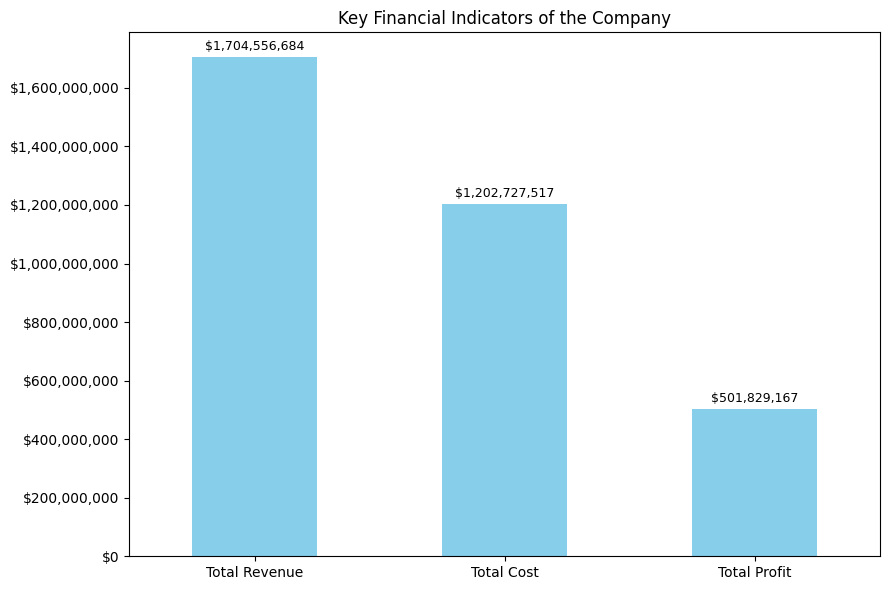

In [ ]:
from matplotlib.ticker import FuncFormatter


totals = df_events_ext[["Revenue", "Cost", "Profit"]].sum()
totals.index = ["Total Revenue", "Total Cost", "Total Profit"]

chart = totals.plot(kind="bar", color="skyblue", figsize=(9, 6), title="Key Financial Indicators of the Company", rot=0)

chart.set_xlabel("")
chart.set_ylabel("")

chart.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:,.0f}'))

chart.bar_label(chart.containers[0], labels=totals.map(lambda v: f'${v:,.0f}'),
             padding=3, fontsize=9)

plt.tight_layout()
plt.show()

###Key Metrics by Category

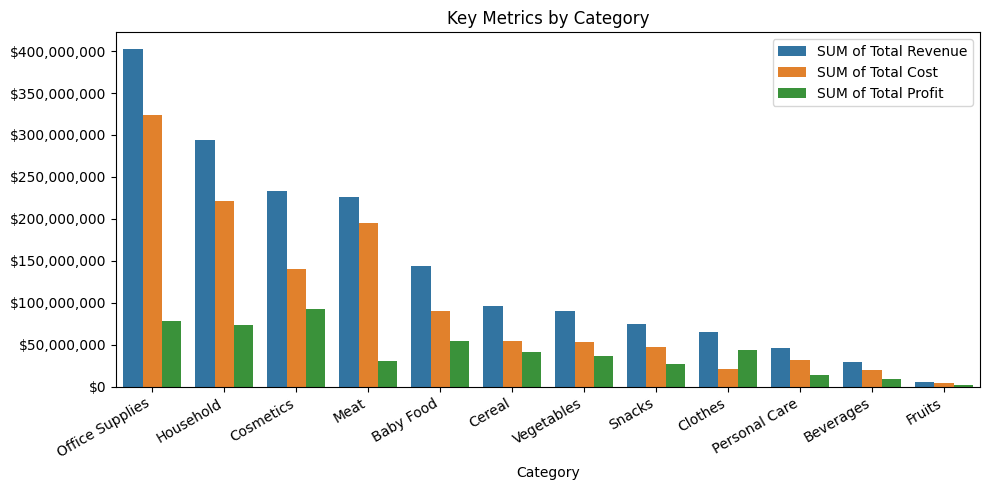

In [ ]:
by_category = (df_events_ext.groupby("item_type")[["Revenue", "Cost", "Profit"]].sum().reset_index())

category_order = by_category.sort_values("Revenue", ascending=False)["item_type"]

long_category = by_category.melt(id_vars="item_type", var_name="metric", value_name="value")

name_map = {"Revenue": "SUM of Total Revenue",
            "Cost": "SUM of Total Cost",
            "Profit": "SUM of Total Profit"}

long_category["metric"] = long_category["metric"].map(name_map)


plt.figure(figsize=(10, 5))
sns.barplot(data=long_category, x="item_type", y="value",
            hue="metric", order=category_order, estimator="sum",
            errorbar=None)
plt.title("Key Metrics by Category")
plt.xlabel("Category")
plt.ylabel("")

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"${x:,.0f}"))

plt.xticks(rotation=30, ha="right")
plt.legend(title="")
plt.tight_layout()
plt.show()

###Amount Units Sold by Category

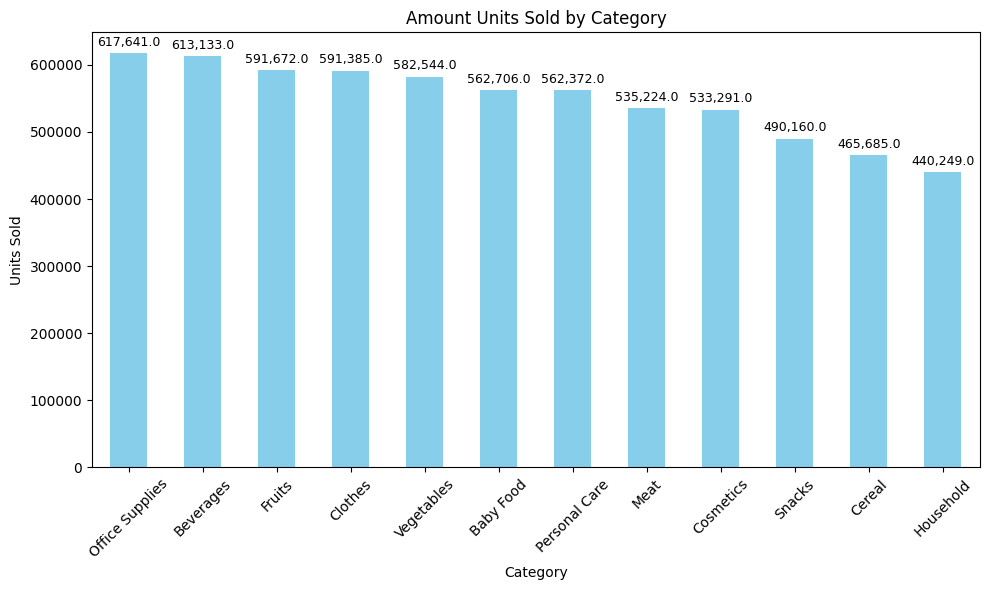

In [ ]:
units_by_category = (df_events_ext.groupby("item_type")["Units Sold"].sum().sort_values(ascending=False))

bar = units_by_category.plot(
    kind="bar",
    color="skyblue",
    figsize=(10, 6),
    title="Amount Units Sold by Category",
    rot=45
)

bar.set_xlabel("Category")
bar.set_ylabel("Units Sold")
#bar.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"${x:,.0f}"))
bar.bar_label(bar.containers[0], labels=units_by_category.map(lambda v: f"{v:,.1f}"), padding=3, fontsize=9)

plt.tight_layout()
plt.show()

###Key Metrics by Country

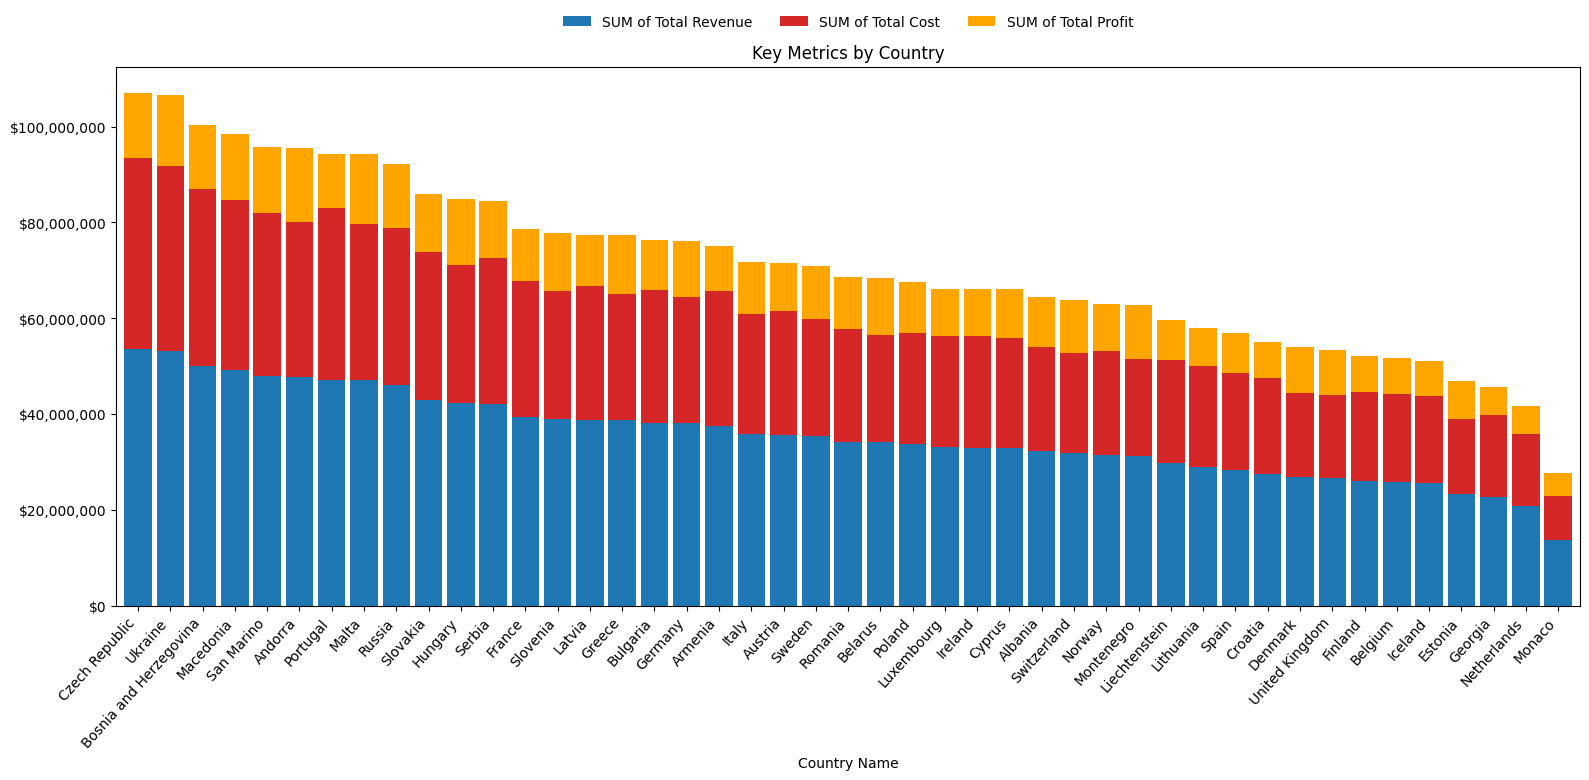

In [ ]:
import textwrap


country_columns = "Country Name"

filter_columns = df_events_ext.query(f"`{country_columns}` != 'Unknown'")

by_country = (filter_columns.groupby(country_columns)[["Revenue", "Cost", "Profit"]].sum().sort_values("Revenue", ascending=False))

bar = by_country.plot(kind="bar", stacked=True, width=0.85, color=["tab:blue", "tab:red", "orange"], figsize=(16, 8), title="Key Metrics by Country", rot=0)

bar.tick_params(axis="x", labelrotation=48)
plt.setp(bar.get_xticklabels(), ha="right")

bar.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"${x:,.0f}"))
bar.legend(["SUM of Total Revenue", "SUM of Total Cost", "SUM of Total Profit"], ncol=3, loc="upper center", bbox_to_anchor=(0.5, 1.12), frameon=False)


plt.tight_layout()
plt.show()

###Key Metrics by Region

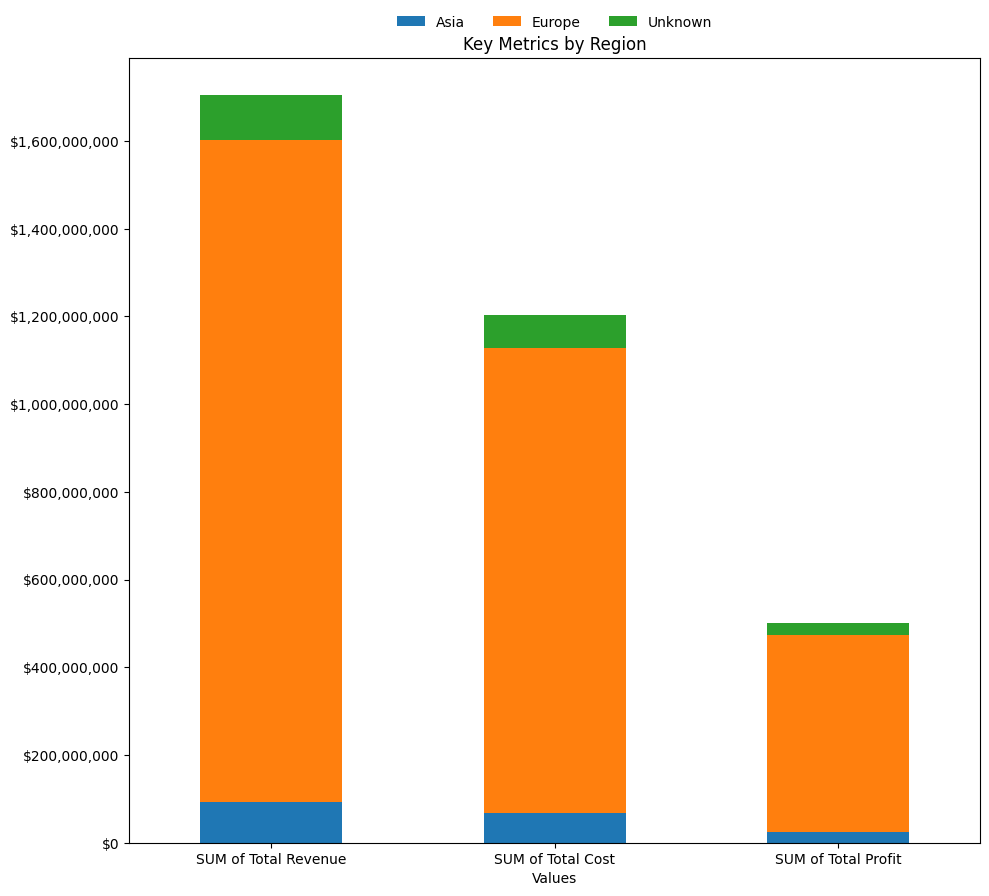

In [ ]:
by_region = (df_events_ext.groupby("Region")[["Revenue", "Cost", "Profit"]].sum())

stack = (by_region.T.rename(index={"Revenue":"SUM of Total Revenue",
                                   "Cost":"SUM of Total Cost",
                                   "Profit":"SUM of Total Profit"}))

bar = stack.plot(kind="bar", stacked=True, figsize=(10, 9), rot=0, title="Key Metrics by Region")

bar.set_xlabel("Values")
bar.set_ylabel("")

bar.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:,.0f}'))
bar.legend(title="", ncol=len(stack.columns), loc="upper center",
           bbox_to_anchor=(0.5, 1.07), frameon=False)

plt.tight_layout()
plt.show()


###Key Metrics by Sub-Region

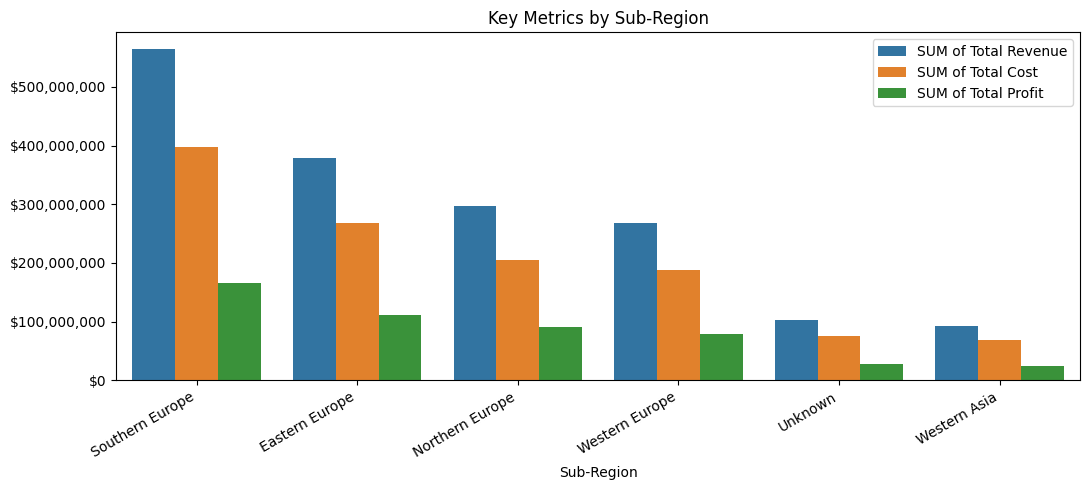

In [ ]:
sub_column = "Sub-Region"

by_sub = (df_events_ext.groupby(sub_column)[["Revenue", "Cost", "Profit"]].sum().reset_index())

sub_order = by_sub.sort_values("Revenue", ascending=False)[sub_column]

long_sub = by_sub.melt(id_vars=sub_column, var_name="metric", value_name="value")


name_map = {"Revenue": "SUM of Total Revenue",
            "Cost": "SUM of Total Cost",
            "Profit": "SUM of Total Profit"}

long_sub["metric"] = long_sub["metric"].map(name_map)


plt.figure(figsize=(11, 5))
sns.barplot(data=long_sub, x=sub_column, y="value",
            hue="metric", order=sub_order, estimator="sum",
            errorbar=None)
plt.title("Key Metrics by Sub-Region")
plt.xlabel("Sub-Region")
plt.ylabel("")

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"${x:,.0f}"))

plt.xticks(rotation=30, ha="right")
plt.legend(title="")
plt.tight_layout()
plt.show()

###Висновки "Key Metrics":

###Європа переважає в показниках частки виручки та прибутку

###Найприбутковіші категорії - Office Supplies і Household


###Analyze Sales by Sales Channel

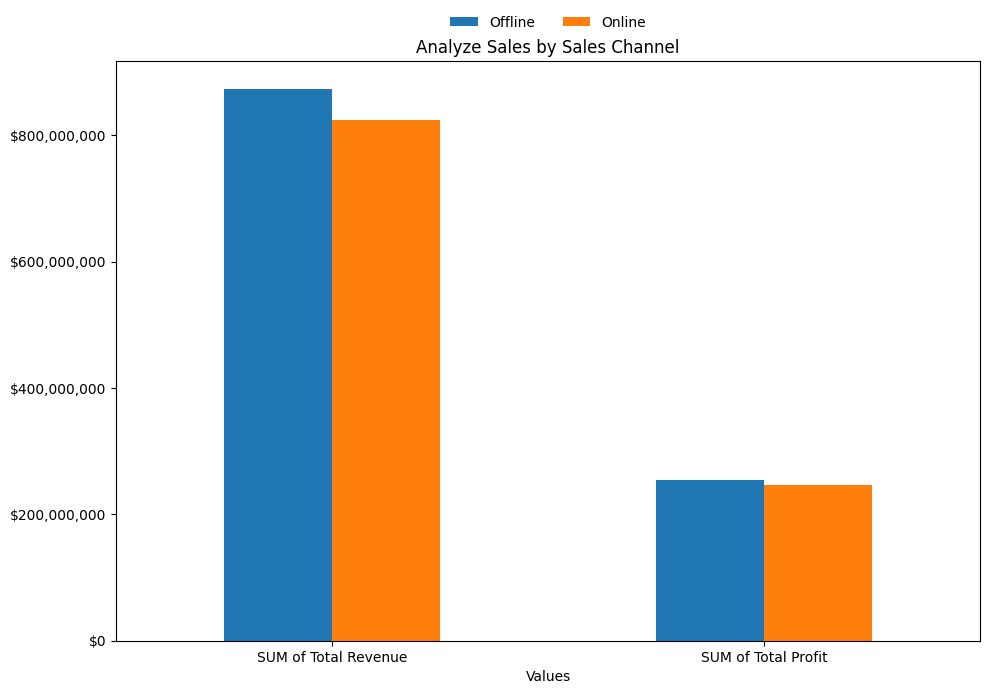

In [ ]:
by_chanel = df_events_ext.groupby("Sales Channel")[["Revenue", "Profit"]].sum()

chart_data = by_chanel.T.rename(index={"Revenue":"SUM of Total Revenue",
                                   "Cost":"SUM of Total Cost",
                                   "Profit":"SUM of Total Profit"
                                   })

order = pd.Index(["Offline", "Online"]).intersection(chart_data.columns, sort=False)
chart_data = chart_data.reindex(columns=order)

chart = chart_data.plot(kind="bar", figsize=(10, 7), rot=0, title="Analyze Sales by Sales Channel")

chart.set_xlabel("Values")
chart.set_ylabel("")

chart.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"${x:,.0f}"))
chart.legend(title="", ncol=len(chart_data.columns), loc="upper center", bbox_to_anchor=(0.5, 1.10), frameon=False)

plt.tight_layout()
plt.show()

###Висновки "Analyze Sales by Sales Chanel":

###Онлайн і офлайн дають співмірні обсяги.

###Median of Interval Days by Category

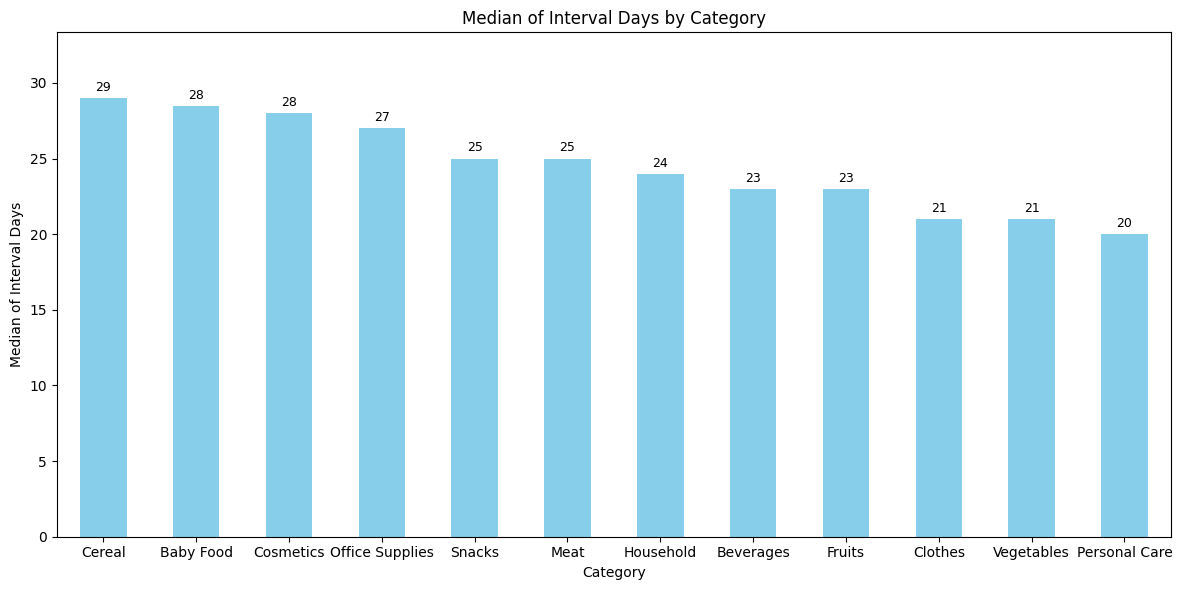

In [ ]:
df = df_events_ext.copy()

df["Interval Days"] = (df["Ship Date"] - df["Order Date"]).dt.days

median_by_category = (df.dropna(subset=["Interval Days"]).groupby("item_type")["Interval Days"].median().sort_values(ascending=False))


bar = median_by_category.plot(kind="bar", color="skyblue", figsize=(12, 6), rot=0, title="Median of Interval Days by Category")

bar.set_xlabel("Category")
bar.set_ylabel("Median of Interval Days")
bar.set_ylim(0, median_by_category.max() * 1.15)

bar.bar_label(bar.containers[0], labels=median_by_category.round(0).astype(int).astype(str), padding=3, fontsize=9)

plt.tight_layout()
plt.show()



###Median of Interval Days by Country

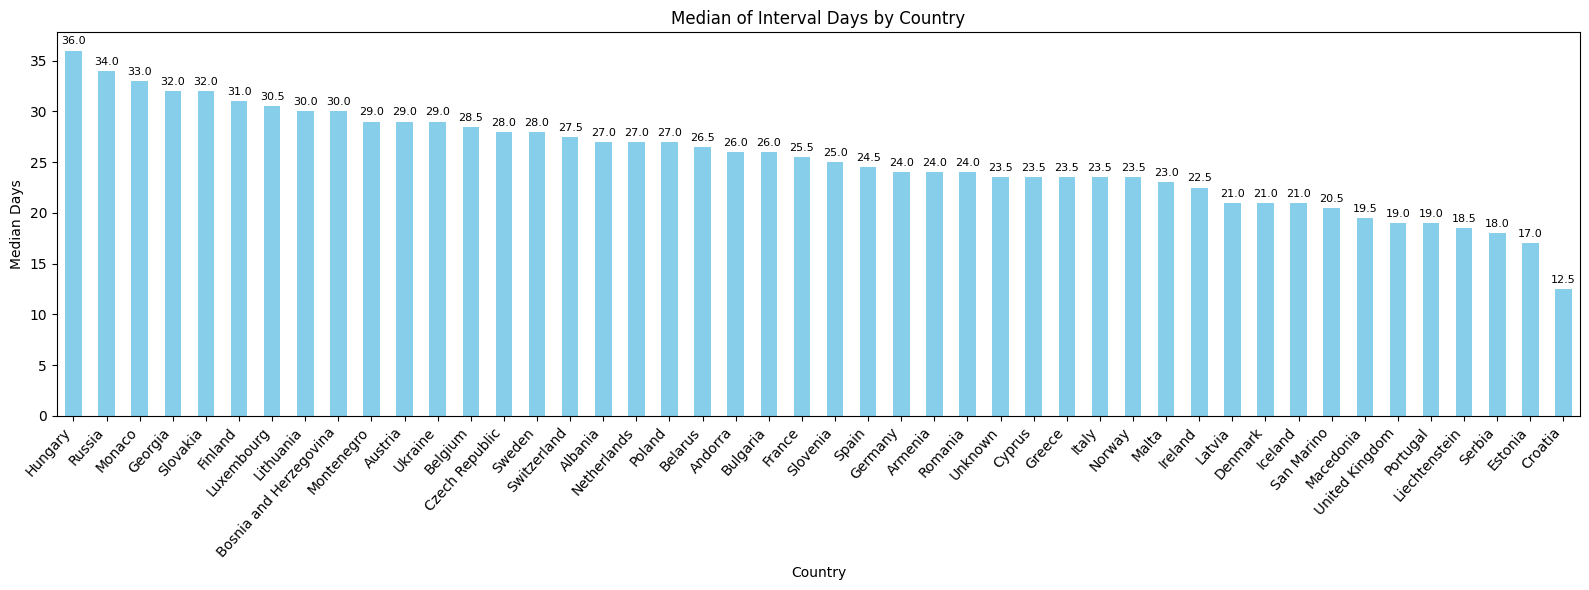

In [ ]:
df = df_events_ext.copy()

df["Interval Days"] = (df["Ship Date"] - df["Order Date"]).dt.days

filter_columns = df.query(f"`{country_columns}` != 'Unknown'")


median_by_countries = (df.dropna(subset=["Interval Days"]).groupby("Country Name")["Interval Days"].median().sort_values(ascending=False))

bar = median_by_countries.plot(kind="bar", color="skyblue", figsize=(16, 6), rot=45, title="Median of Interval Days by Country")
bar.set_xlabel("Country")
bar.set_ylabel("Median Days")

bar.tick_params(axis="x", labelrotation=48)
plt.setp(bar.get_xticklabels(), ha="right")

bar.bar_label(bar.containers[0],
             labels=median_by_countries.round(1).astype(str),
             padding=3, fontsize=8)
plt.tight_layout()
plt.show()


###Median of Interval Days by Region



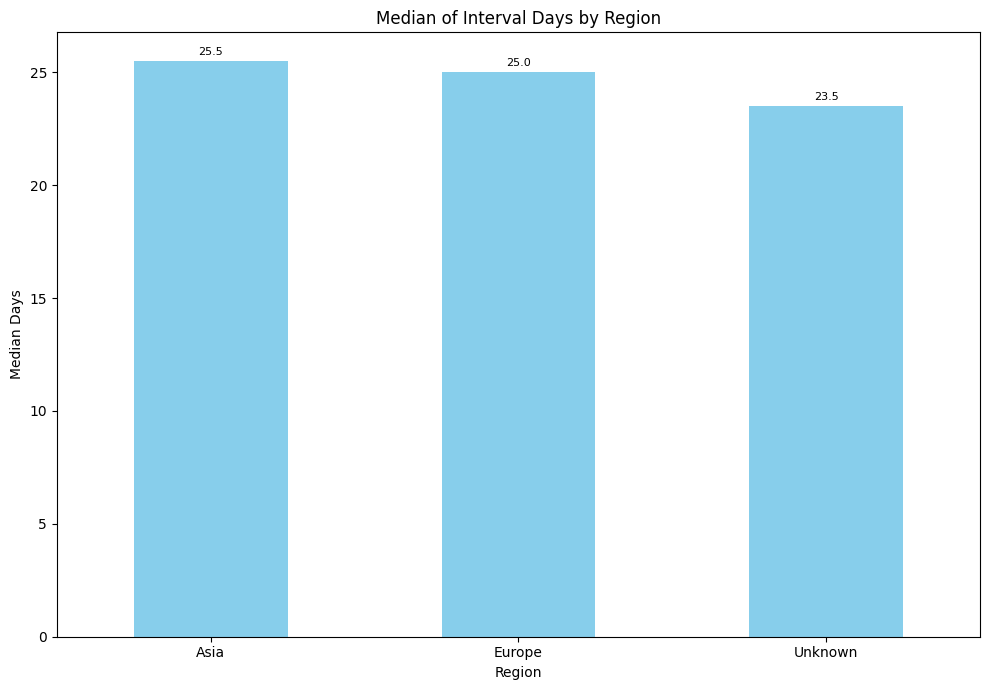

In [ ]:
df = df_events_ext.copy()

df["Interval Days"] = (df["Ship Date"] - df["Order Date"]).dt.days

median_by_region = (df.dropna(subset=["Interval Days"]).groupby("Region")["Interval Days"].median().sort_values(ascending=False))

bar = median_by_region.plot(kind="bar", color="skyblue", figsize=(10, 7), rot=0, title="Median of Interval Days by Region")

bar.set_xlabel("Region")
bar.set_ylabel("Median Days")

bar.bar_label(bar.containers[0],
             labels=median_by_region.round(1).astype(str),
             padding=3, fontsize=8)
plt.tight_layout()
plt.show()

### Висновок "Interval Days":

###Країни. Довше за все відвантаження у частини Балкан/Східної Європи. Нйшвидші у Бенілюкс/Скандинавії/UK

###Регіони. Різниця між регіонами невелика.

###Interval Days vs Profit

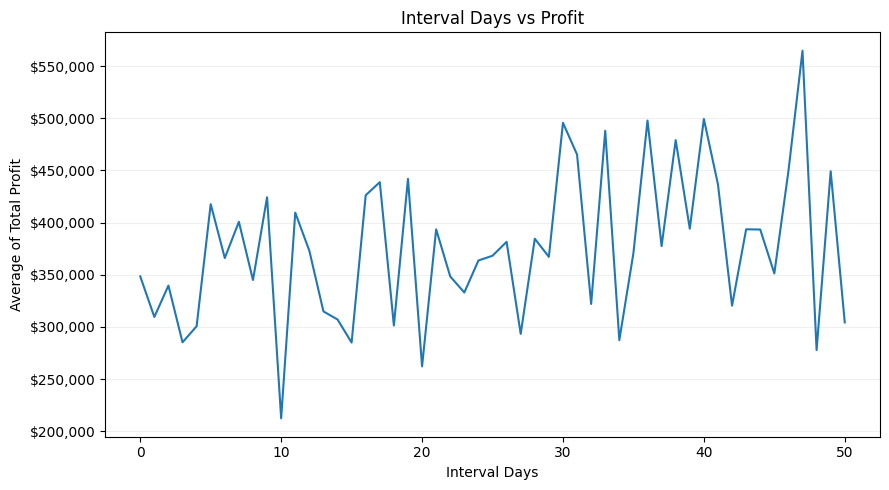

In [ ]:
df = df_events_ext.copy()

df["Interval Days"] = (df["Ship Date"] - df["Order Date"]).dt.days

avg_profit = (df.dropna(subset=["Interval Days", "Profit"])
                .query("`Interval Days` >= 0 and `Interval Days` <= 50")
                .assign(**{"Interval Days": lambda d: d["Interval Days"].astype(int)})
                .groupby("Interval Days")["Profit"]
                .mean()
                .sort_index())

ax = avg_profit.plot(figsize=(9, 5), legend=False, title="Interval Days vs Profit")
ax.set_xlabel("Interval Days")
ax.set_ylabel("Average of Total Profit")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:,.0f}'))
ax.grid(True, axis="y", alpha=0.2)

plt.tight_layout()
plt.show()

###Interval Days vs Revenue

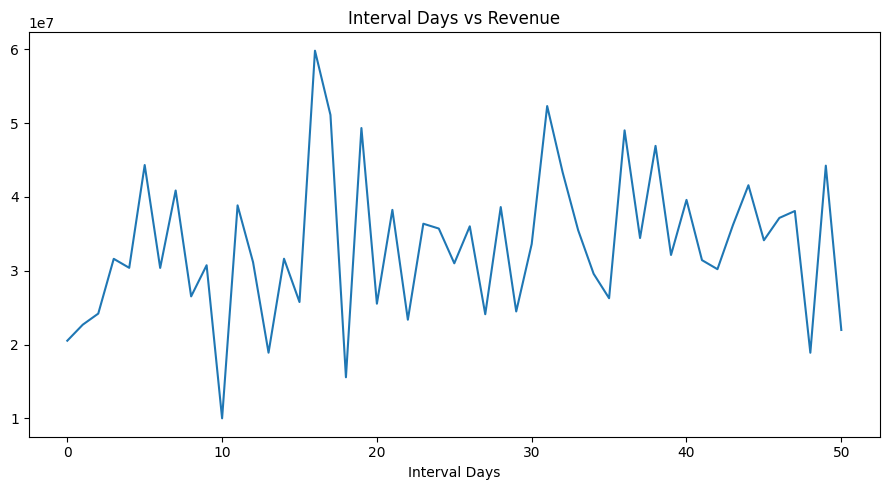

In [ ]:
df = df_events_ext.copy()

df["Interval Days"] = (df["Ship Date"] - df["Order Date"]).dt.days

agg = (df.dropna(subset=["Interval Days", "Revenue"])
         .assign(**{"Interval Days": lambda d: d["Interval Days"].astype(int)})
         .query("0 <= `Interval Days` <= 50")
         .groupby("Interval Days")[["Revenue"]]
         .sum()
         .sort_index())

ax = agg["Revenue"].plot(figsize=(9,5), title="Interval Days vs Revenue")

plt.tight_layout()
plt.show()

###Висновок Interval Days vs Revenue, Interval Days vs Profit:

###Судячи по графікам і розрахункам різниці немає. Прибуток не залежить від часу відвантаження

###Analyze Revenue Dynamics by Year for Country  (Pivot Table)

In [ ]:
import calendar


df = df_events_ext.copy()

df = df.dropna(subset=["Order Date"])

years = (df["Order Date"].dt.year.astype(int).sort_values().unique())
cat_year = pd.CategoricalDtype(categories=years, ordered=True)
df["Order Year"] = df["Order Date"].dt.year.astype(int).astype(cat_year)

pt = (pd.pivot_table(
    df,
    index="Country Name",
    columns="Order Year",
    values="Revenue",
    aggfunc="sum",
    fill_value=0,
    margins=True,
    margins_name="Grand Total"
    )
    .sort_index()
)

display(pt.style.format("${:,.2f}").set_caption("Analyze Revenue Dynamics by Month for Country"))

/tmp/ipython-input-3035080506.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pt = (pd.pivot_table(


Order Year,2010,2011,2012,2013,2014,2015,2016,2017,Grand Total
Country Name,,,,,,,,,
Albania,"$8,531,301.81","$3,265,577.84","$5,984,703.94","$644,070.88","$235,189.76","$6,377,576.71","$6,017,628.70","$1,168,804.23","$32,224,853.87"
Andorra,"$10,463,527.98","$2,222,978.33","$8,720,081.94","$3,159,874.49","$4,491,127.58","$1,884,229.67","$15,724,851.18","$1,090,022.00","$47,756,693.17"
Armenia,"$7,672,185.09","$2,352,342.66","$5,659,750.68","$1,007,077.26","$4,945,295.64","$11,125,277.25","$3,017,379.43","$1,740,532.20","$37,519,840.21"
Austria,"$11,632,719.09","$2,089,377.69","$631,013.96","$3,058,988.19","$3,492,689.66","$12,220,557.65","$1,271,275.87","$1,344,249.38","$35,740,871.49"
Belarus,"$2,080,164.18","$4,683,738.00","$4,707,413.16","$4,428,884.19","$1,790,983.70","$6,592,067.02","$7,382,154.75","$2,570,855.77","$34,236,260.77"
Belgium,"$1,300,591.92","$1,947,624.15","$4,291,025.49","$1,690,770.40","$1,573,637.45","$7,064,534.35","$7,622,501.60","$361,886.94","$25,852,572.30"
Bosnia and Herzegovina,"$1,331,049.52","$2,520,932.36","$20,506,108.34","$4,399,195.84","$397,495.31","$17,905,347.83","$3,057,379.29",$0.00,"$50,117,508.49"
Bulgaria,"$9,547,462.15","$914,953.60","$11,115,356.25","$1,497,865.55","$4,814,151.83","$2,635,446.87","$3,875,249.35","$3,761,070.10","$38,161,555.70"
Croatia,"$4,683,944.79","$52,945.26","$5,973,105.24","$13,494,252.99","$925,450.86",$0.00,"$1,876,328.22","$496,801.50","$27,502,828.86"


###Analyze Revenue Dynamics by Year for Region



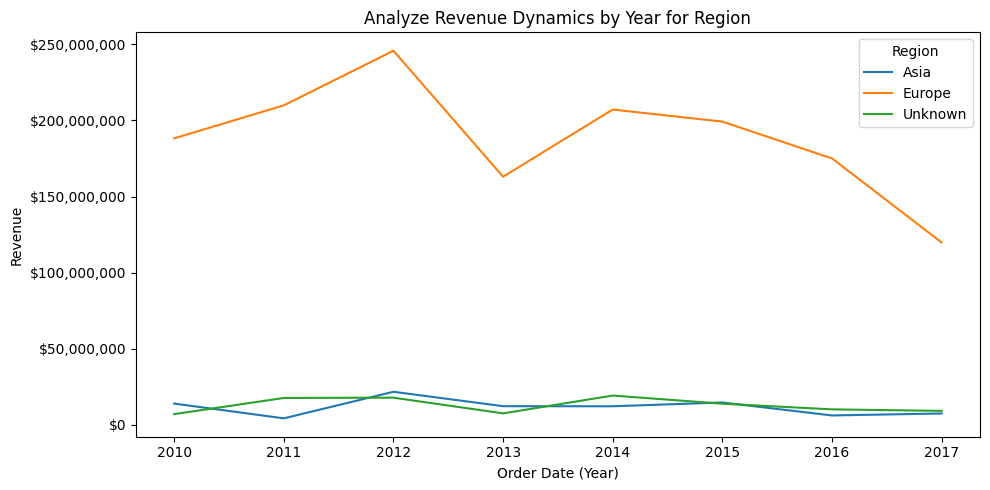

In [ ]:
df = df_events_ext.copy()

df["Order Year"] = df["Order Date"].dt.year

revenue_year_region = (df.dropna(subset=["Order Year", "Region"]).groupby(["Order Year", "Region"], as_index=False)["Revenue"].sum().sort_values("Order Year"))

plt.figure(figsize=(10, 5))

sns.lineplot(data=revenue_year_region, x="Order Year", y="Revenue", hue="Region", errorbar=None)

plt.title("Analyze Revenue Dynamics by Year for Region")
plt.xlabel("Order Date (Year)")
plt.ylabel("Revenue")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

###Units Sold by Year for Region

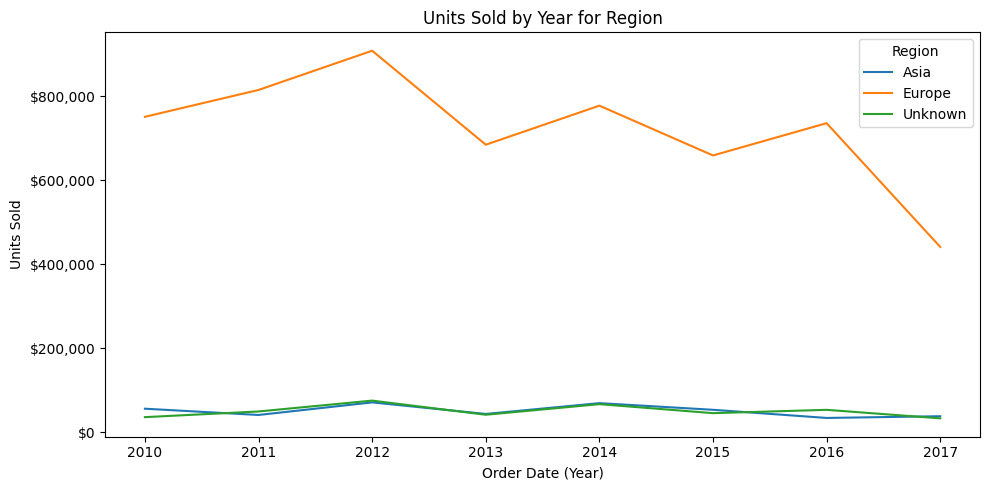

In [ ]:
df = df_events_ext.copy()

df["Order Year"] = df["Order Date"].dt.year

units_year_region = (df.dropna(subset=["Order Year", "Region", "Units Sold"]).groupby(["Order Year", "Region"], as_index=False)["Units Sold"].sum().sort_values("Order Year"))

plt.figure(figsize=(10, 5))

sns.lineplot(data=units_year_region, x="Order Year", y="Units Sold", hue="Region", errorbar=None)

plt.title("Units Sold by Year for Region")
plt.xlabel("Order Date (Year)")
plt.ylabel("Units Sold")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

### Висновки "Sales Dynamics by Year":

### Головне. Європа робить вагому частку виручки й обсягів; Азія та Unknown - невеликі внески.
### Динаміка. Обидві криві мають пік 2012, коротке відновлення 2014 і стійкий спад до 2017, причому у 2017-му - різкий провал саме в Європі.

###Analyze Revenue Dynamics by Month for Country (Pivot Table)

In [ ]:
import calendar


df = df_events_ext.copy()

months = list(calendar.month_name)[1:]

cat_month = pd.CategoricalDtype(categories=months, ordered=True)
df["Order Month"] = df["Order Date"].dt.month_name().astype(cat_month)

pt = (pd.pivot_table(
    df,
    index="Country Name",
    columns="Order Month",
    values="Revenue",
    aggfunc="sum",
    fill_value=0,
    margins=True,
    margins_name="Grand Total"
    )
    .reindex(columns=months + ["Grand Total"])
    .sort_index()
)

display(pt.style.format("${:,.2f}").set_caption("Analyze Revenue Dynamics by Year for Country"))

/tmp/ipython-input-3297044405.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pt = (pd.pivot_table(


Order Month,January,February,March,April,May,June,July,August,September,October,November,December,Grand Total
Country Name,,,,,,,,,,,,,
Albania,"$1,474,922.16",$0.00,"$3,794,205.38","$1,183,069.84","$1,447,182.32","$2,189,934.80","$6,883,171.98","$5,632,749.78","$4,205,426.80","$871,392.40","$364,934.85","$4,177,863.56","$32,224,853.87"
Andorra,"$2,599,830.63","$4,956,468.34","$7,665,270.67","$4,877,737.00","$3,072,555.60","$4,249,455.19","$11,742.88","$6,954,917.59","$5,820,013.49","$3,905,326.24","$3,183,979.66","$459,395.88","$47,756,693.17"
Armenia,"$2,060,501.69","$5,454,184.70","$722,714.52",$0.00,"$1,406,875.92","$6,667,613.79","$266,557.26","$4,859,329.02","$6,726,276.44","$4,310,450.13","$3,203,733.72","$1,841,603.02","$37,519,840.21"
Austria,"$168,600.90","$5,590,637.85","$5,571,752.76","$5,396,522.60","$3,890,952.23",$0.00,"$4,677,695.07","$3,942,923.01","$1,180,833.09",$0.00,"$3,281,581.72","$2,039,372.26","$35,740,871.49"
Belarus,"$2,691,717.20","$3,845,225.58","$499,506.15",$0.00,$0.00,"$3,536,505.12","$8,148,919.34","$358,053.88","$5,152,864.00","$1,222,518.50","$4,361,130.02","$4,419,820.98","$34,236,260.77"
Belgium,"$6,668,183.97",$0.00,"$2,921,166.36","$165,793.57","$2,656,979.42","$189,687.85","$828,535.79","$779,401.38","$3,750,415.26","$77,532.30","$3,480,080.08","$4,334,796.32","$25,852,572.30"
Bosnia and Herzegovina,"$803,961.09","$8,566,796.29","$5,791,368.99","$1,953,402.56","$1,302.42","$2,742,580.08","$5,241,736.38","$376,231.05",$0.00,"$6,526,684.63","$12,083,098.84","$6,030,346.16","$50,117,508.49"
Bulgaria,"$836,083.62","$3,256,398.86","$1,269,598.94","$7,411,289.70","$8,738,921.45","$1,149,133.54","$4,347,998.34","$77,131.11","$2,563,477.32","$5,177,629.87","$2,635,446.87","$698,446.08","$38,161,555.70"
Croatia,"$541,810.24","$3,040,860.30","$370,710.25","$6,468,853.60","$4,290,692.78","$2,350,162.02",$0.00,$0.00,"$1,339,454.16","$3,513,763.66","$1,893,718.68","$3,692,803.17","$27,502,828.86"


###Analyze Sales Dynamics by Month for Region

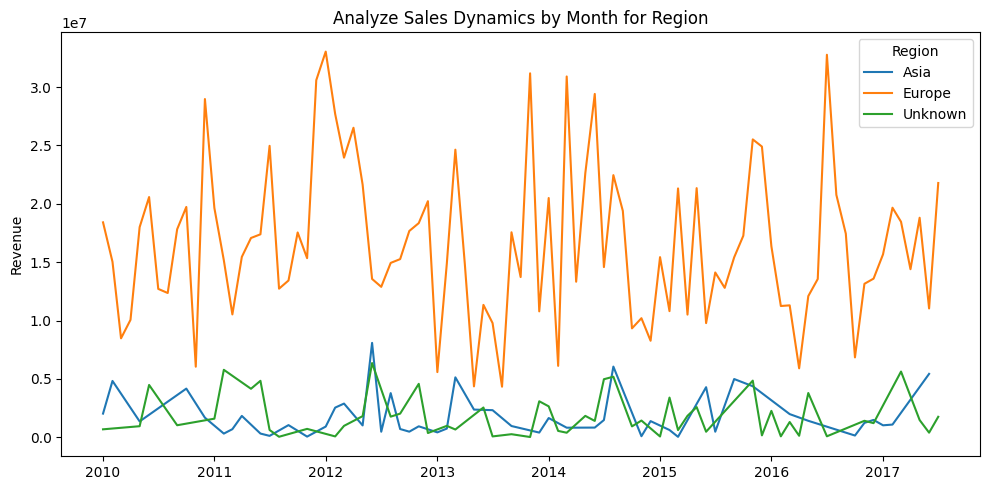

In [ ]:
df = df_events_ext.copy()

df["Month"] = df["Order Date"].dt.month_name()

months = ["January","February","March","April","May","June",
          "July","August","September","October","November","December"]
df["Order Month"] = df["Order Date"].dt.to_period("M").dt.to_timestamp()


region_column = "Region"


monthly = (df.groupby(["Order Month", region_column], as_index=False)["Revenue"].sum())

plt.figure(figsize=(10, 5))

sns.lineplot(data=monthly, x="Order Month", y="Revenue", hue=region_column, estimator="sum")
plt.title("Analyze Sales Dynamics by Month for Region")
plt.xlabel("")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

###Units Sold by Month for Region

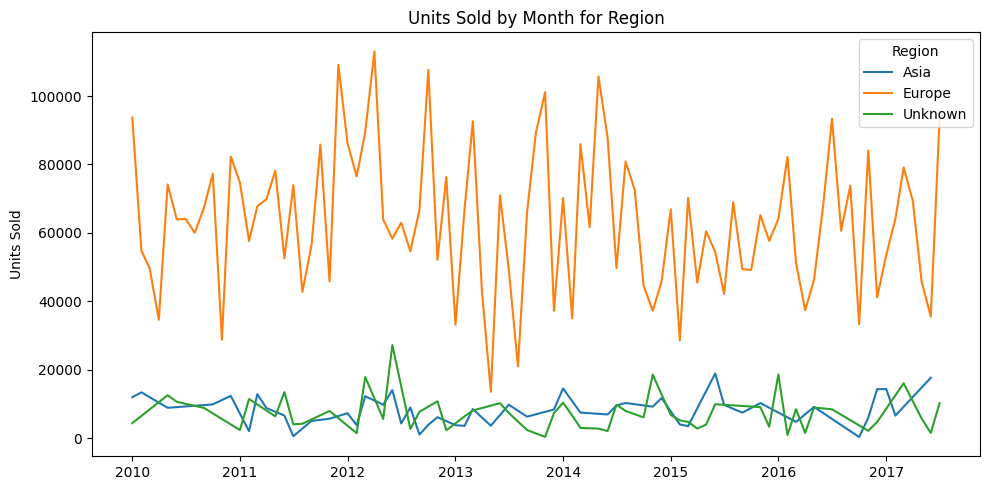

In [ ]:
df = df_events_ext.copy()
df["Month"] = df["Order Date"].dt.month_name()

months = ["January","February","March","April","May","June",
          "July","August","September","October","November","December"]
df["Order Month"] = df["Order Date"].dt.to_period("M").dt.to_timestamp()


region_column = "Region"


monthly = (df.groupby(["Order Month", region_column], as_index=False)["Units Sold"].sum())

plt.figure(figsize=(10, 5))

sns.lineplot(data=monthly, x="Order Month", y="Units Sold", hue=region_column, estimator="sum")
plt.title("Units Sold by Month for Region")
plt.xlabel("")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()

### Висновки "Sales Dynamics by Month":

### Сезонність задає Європа; Азія та Unknown - малі частки.

### По місяцях видно пік у березні та червні, глибоку просадку в липні-серпні, далі відновлення у листопаді–грудні.

###Anyalyze Sales Dynamics by Days of the Week

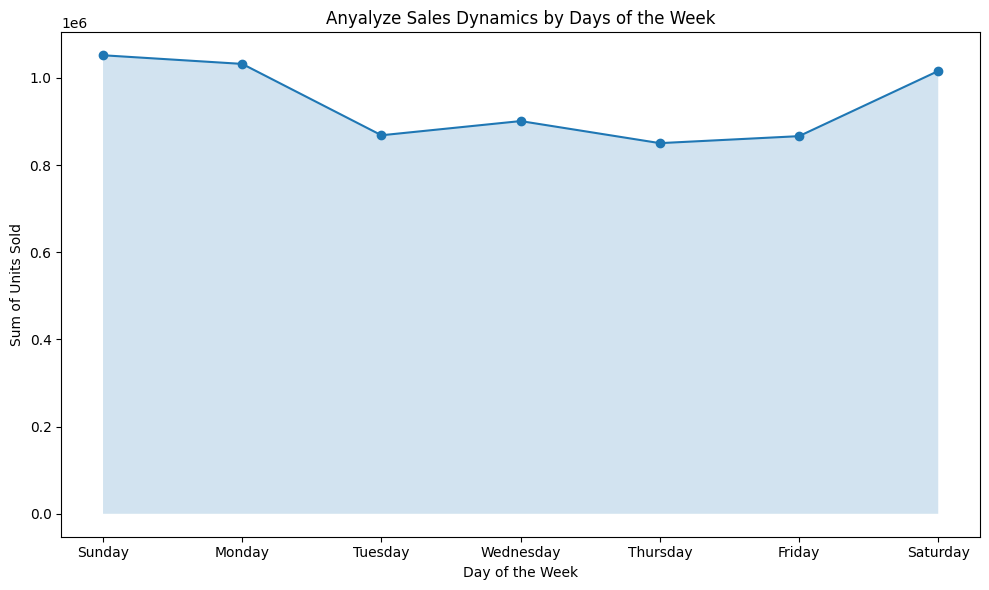

In [ ]:
df = df_events_ext.copy()

day_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
cat = pd.api.types.CategoricalDtype(categories=day_order, ordered=True)
df["Day of Week"] = df["Order Date"].dt.day_name().astype(cat)

by_day = (df.groupby("Day of Week", observed=False, as_index=False)["Units Sold"].sum().sort_values("Day of Week"))

plt.figure(figsize=(10, 6))
plt.plot(by_day["Day of Week"], by_day["Units Sold"], marker="o")
plt.fill_between(by_day["Day of Week"], by_day["Units Sold"], alpha=0.2)

plt.title("Anyalyze Sales Dynamics by Days of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Sum of Units Sold")
plt.tight_layout()
plt.show()

### Висновки "Sales Dynamics by Week":

### Піки продажів - неділя та субота, понеділок також сильний.

###Найслабші дні - вівторок-четвер

***Висновки та рекомендації за результатами аналізу даних***

* Відновлення рівня продажів.

Слід працювати над поверненням до рівня продажів 2011-2012 років, оскільки в останньому році спостерігається суттєве падіння як обсягів продажів, так і доходу. Перевірити причини європейського спаду (канали/продукт-мікс/ціни/логістика) та шукати точки росту в Азії.

* Фокус на високоприбуткові категорії.

Найбільш прибутковою категорією є косметика (можемо побачити найвищий прибуток на діаграмі Key Metrics by Category) . Бізнесу варто інвестувати в розширення асортименту цих товарів, посилити їх маркетинг. Також потрібно звернути увагу на категорію  “М’ясо” яка демонструє  дуже низьку прибутковість, що потребує уваги. Рекомендовано або розглянути виведення цього продукту з асортименту, або покращити показники ефективності по витратам.

* Сезонні тенденції продажів.

Є чітка тенденція зниження продажів і доходів, починаючи з липня, та їхнього активного зростання з грудня. Це може свідчити про сезонний характер попиту.

Найімовірніше сезонні: Office Supplies (червень/листопад), Clothes (весна/осінь), Beverages & Snacks (літо). Більш рівні: Household, Baby Food.

* Динаміка цінової політики.

Виявлено закономірність другого етапу підвищення цін на продукції у жовтні кожного року. Це варто враховувати під час планування цінової стратегії та прогнозування попиту.

* Розвиток на європейському ринкуюї.

Європа є основним джерелом доходу та прибутку. Компанії варто розширювати свою присутність у менш охоплених субрегіонах.

* Вплив часу доставки на прибуток.

Аналіз показав відсутність прямої кореляції між часом доставки та прибутком. Це означає, що компанія може        зосередитись на оптимізації витрат на логістику без ризику зниження рентабельності.

* Перенести ключові релізи та рекламні активності на вихідні та понеділок.